<a href="https://colab.research.google.com/github/zehraubay/zehraubay/blob/main/egitim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 23.5 MB/s eta 0:00:00


In [2]:
import ultralytics
import os
from pathlib import Path
from ultralytics import YOLO
from IPython.display import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
train_dir = "/content/drive/MyDrive/YOLO/train"
valid_dir = "/content/drive/MyDrive/YOLO/val"
test_dir = "/content/drive/MyDrive/YOLO/test"

In [19]:
data_yaml = f"""
train: /content/drive/MyDrive/YOLO/train
val: /content/drive/MyDrive/YOLO/val
test: /content/drive/MyDrive/YOLO/test

nc: 2  # Sınıf sayısı
names: ['Bird', 'Uav']  # Sınıf isimleri
"""

# YAML dosyasını kaydet
with open("data.yaml", "w", encoding="utf-8") as file:
    file.write(data_yaml)

In [6]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 104MB/s]


In [7]:
model.train(data='data.yaml', epochs=40, imgsz=640, batch=16, device=0, amp=True, lr0=0.01, lrf=0.01, augment=True)

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 25.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/.shortcut-targets-by-id/1wmvUbSAv6i_-e9oWcHl5d_IXy3rNJ_F7/YOLO/train... 5962 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5963/5963 [04:51<00:00, 20.47it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/1wmvUbSAv6i_-e9oWcHl5d_IXy3rNJ_F7/YOLO/train.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 11045. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1wmvUbSAv6i_-e9oWcHl5d_IXy3rNJ_F7/YOLO/val... 1706 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1706/1706 [01:30<00:00, 18.85it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1wmvUbSAv6i_-e9oWcHl5d_IXy3rNJ_F7/YOLO/val.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 2996. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.32G      1.605       2.22       1.63         33        640: 100%|██████████| 373/373 [02:45<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.16it/s]


                   all       1706       2996      0.534      0.495       0.48      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.43G      1.693      1.856      1.701         50        640: 100%|██████████| 373/373 [02:35<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.32it/s]


                   all       1706       2996       0.63      0.456      0.493      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.66G      1.722       1.77      1.742         30        640: 100%|██████████| 373/373 [02:38<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.25it/s]


                   all       1706       2996      0.593      0.552      0.578      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      5.56G      1.695      1.662      1.701         59        640: 100%|██████████| 373/373 [02:36<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.33it/s]


                   all       1706       2996       0.61      0.574      0.559      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.59G      1.641      1.582      1.667         32        640: 100%|██████████| 373/373 [02:29<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]


                   all       1706       2996      0.604      0.648      0.675      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      5.19G      1.616      1.495      1.646         24        640: 100%|██████████| 373/373 [02:27<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.19it/s]


                   all       1706       2996       0.68       0.67       0.72      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      5.93G      1.579      1.429       1.61         19        640: 100%|██████████| 373/373 [02:33<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.36it/s]


                   all       1706       2996      0.713      0.676      0.744      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      5.18G       1.57      1.405      1.595         22        640: 100%|██████████| 373/373 [02:35<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1706       2996       0.75      0.705      0.762      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.44G      1.499      1.316      1.571         24        640: 100%|██████████| 373/373 [02:30<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.18it/s]


                   all       1706       2996       0.77      0.737      0.792      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.81G      1.515      1.303      1.564         27        640: 100%|██████████| 373/373 [02:33<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.37it/s]


                   all       1706       2996      0.747      0.733      0.781      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      4.79G      1.482       1.26      1.551         34        640: 100%|██████████| 373/373 [02:36<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.30it/s]


                   all       1706       2996      0.779      0.755      0.807      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.96G      1.475      1.239      1.544         26        640: 100%|██████████| 373/373 [02:30<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.15it/s]


                   all       1706       2996      0.736      0.741      0.779      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.66G      1.449      1.214      1.523         47        640: 100%|██████████| 373/373 [02:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.31it/s]


                   all       1706       2996      0.734      0.737      0.793      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.62G      1.427      1.151      1.507         22        640: 100%|██████████| 373/373 [02:29<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.17it/s]


                   all       1706       2996      0.779      0.772      0.814       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.19G      1.446      1.152      1.501         35        640: 100%|██████████| 373/373 [02:28<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.18it/s]


                   all       1706       2996      0.816      0.767       0.83      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       6.2G      1.432      1.146      1.505         27        640: 100%|██████████| 373/373 [02:30<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.29it/s]

                   all       1706       2996      0.809      0.804      0.849      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.22G      1.402      1.105      1.495         32        640: 100%|██████████| 373/373 [02:29<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.09it/s]


                   all       1706       2996      0.824      0.805      0.849      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      5.32G        1.4      1.095      1.474        129        640: 100%|██████████| 373/373 [02:28<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.18it/s]

                   all       1706       2996      0.827      0.807      0.856      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      5.34G      1.372      1.069      1.465         26        640: 100%|██████████| 373/373 [02:30<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.28it/s]

                   all       1706       2996      0.824      0.807      0.851      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.92G      1.364      1.056      1.455         51        640: 100%|██████████| 373/373 [02:30<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.15it/s]


                   all       1706       2996      0.852       0.82      0.866      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.68G      1.354      1.029      1.447         39        640: 100%|██████████| 373/373 [02:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.41it/s]


                   all       1706       2996      0.813      0.816       0.86      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.15G      1.351      1.007      1.446         24        640: 100%|██████████| 373/373 [02:29<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.18it/s]


                   all       1706       2996      0.817      0.812      0.861      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      4.11G      1.347      1.006      1.443         28        640: 100%|██████████| 373/373 [02:29<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.38it/s]


                   all       1706       2996      0.814       0.82       0.86      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.15G      1.345      0.988       1.44         24        640: 100%|██████████| 373/373 [02:32<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.39it/s]

                   all       1706       2996      0.821      0.826      0.863      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       6.7G       1.33     0.9889       1.42         33        640: 100%|██████████| 373/373 [02:35<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.40it/s]


                   all       1706       2996      0.822      0.821      0.868      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      4.06G      1.297     0.9575      1.416         24        640: 100%|██████████| 373/373 [02:28<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.15it/s]


                   all       1706       2996      0.849      0.823      0.876      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       6.4G      1.311     0.9548       1.41         23        640: 100%|██████████| 373/373 [02:31<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1706       2996      0.834      0.842      0.871      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.76G      1.289      0.932      1.404         22        640: 100%|██████████| 373/373 [02:32<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.25it/s]


                   all       1706       2996       0.86      0.836      0.879      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      4.63G      1.281      0.926      1.399         34        640: 100%|██████████| 373/373 [02:29<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.17it/s]

                   all       1706       2996      0.848      0.841      0.881       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      5.93G      1.285     0.9231      1.392         64        640: 100%|██████████| 373/373 [02:30<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.15it/s]

                   all       1706       2996       0.85      0.839       0.88      0.546


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40       4.1G      1.229     0.7216      1.396         12        640: 100%|██████████| 373/373 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [06:49<00:00,  7.59s/it]

                   all       1706       2996      0.867      0.847      0.888      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      5.11G        1.2     0.7005      1.382         11        640: 100%|██████████| 373/373 [02:22<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.27it/s]


                   all       1706       2996      0.857      0.852      0.884      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      4.84G      1.184     0.6691      1.376         29        640: 100%|██████████| 373/373 [02:26<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.35it/s]

                   all       1706       2996       0.87      0.855      0.892      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       4.8G      1.159     0.6617      1.362         11        640: 100%|██████████| 373/373 [02:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:26<00:00,  2.07it/s]

                   all       1706       2996      0.871      0.853       0.89       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       4.3G      1.146      0.645      1.344         12        640: 100%|██████████| 373/373 [02:29<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]


                   all       1706       2996      0.869      0.849       0.89      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      4.44G      1.133     0.6299      1.333         11        640: 100%|██████████| 373/373 [02:28<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.34it/s]

                   all       1706       2996      0.872      0.863      0.892       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      4.82G       1.12     0.6234      1.327         48        640: 100%|██████████| 373/373 [02:23<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:23<00:00,  2.30it/s]


                   all       1706       2996       0.87      0.865      0.895      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      4.89G      1.123     0.6164      1.328         14        640: 100%|██████████| 373/373 [02:26<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.25it/s]


                   all       1706       2996      0.871      0.863      0.894      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      4.22G      1.093     0.5999      1.309         11        640: 100%|██████████| 373/373 [02:22<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:24<00:00,  2.20it/s]

                   all       1706       2996      0.872      0.859      0.892      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      4.74G       1.09     0.5936        1.3         12        640: 100%|██████████| 373/373 [02:26<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.41it/s]

                   all       1706       2996      0.876      0.862      0.895      0.574



40 epochs completed in 2.067 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:30<00:00,  1.80it/s]


                   all       1706       2996      0.845      0.865      0.895       0.58
                  Bird        851       2082      0.819      0.769       0.82       0.45
                   Uav        855        914      0.872      0.962       0.97      0.711
Speed: 0.3ms preprocess, 7.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4da21e0910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [26]:
image_path = '/content/drive/MyDrive/YOLO/test/0ab66649-320_-_2023-03-04T124532-688_jpg.rf.8f4ff241d9d8658066efc40166601e87.jpg'

In [27]:
results = model.predict(source=image_path, save=True)


image 1/1 /content/drive/MyDrive/YOLO/test/0ab66649-320_-_2023-03-04T124532-688_jpg.rf.8f4ff241d9d8658066efc40166601e87.jpg: 640x640 1 Bird, 28.5ms
Speed: 2.4ms preprocess, 28.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train5


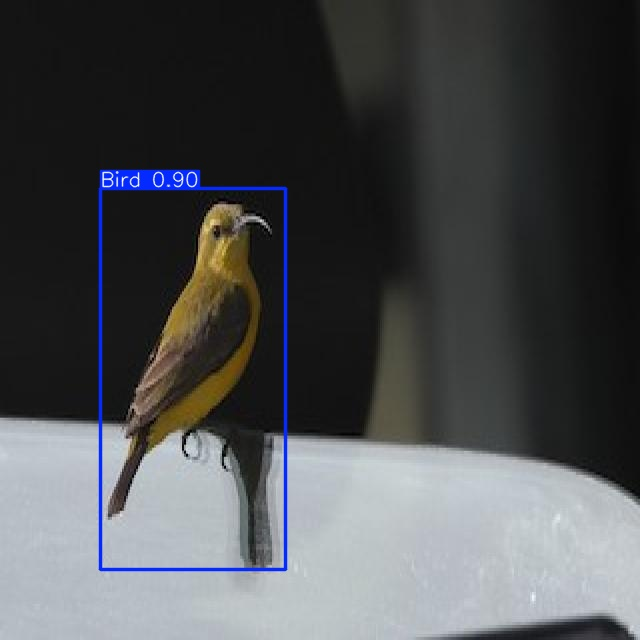

In [28]:
display_image = '/content/runs/detect/train5/0ab66649-320_-_2023-03-04T124532-688_jpg.rf.8f4ff241d9d8658066efc40166601e87.jpg'  # Tahmin sonucu kaydedilen varsayılan yer
Image(filename=display_image)